In [ ]:
!pip install -U scikit-fuzzy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 7.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894077 sha256=2eccf8d4820fcbbe0c40ad7366056a94a6e47c2b1b309c2d73ef2c2a3e8e4e97
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


This line imports the scikit-fuzzy library and aliases it as fuzz. The scikit-fuzzy library is a collection of algorithms for fuzzy logic and fuzzy control systems in Python

This line imports the control submodule from the scikit-fuzzy library and aliases it as ctrl. This submodule provides tools to create fuzzy control systems.

In [ ]:
#new antecedent/consequent objects hold universe variables and members
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import numpy as np

#functions
quality=ctrl.Antecedent(np.arange(0,11,1),'quality')
service=ctrl.Antecedent(np.arange(0,11,1),'service')
tip=ctrl.Consequent(np.arange(0,26,1),'tip')

quality.automf(3)
service.automf(3)

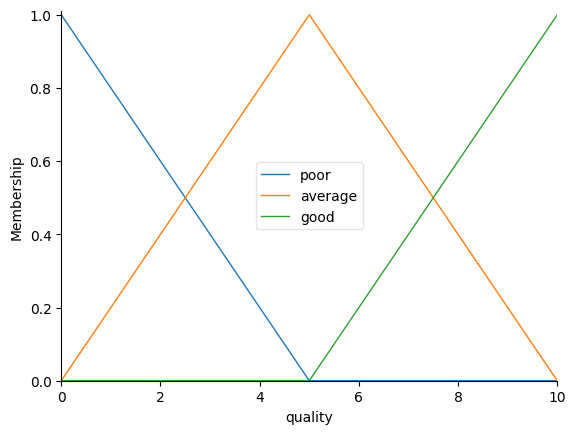

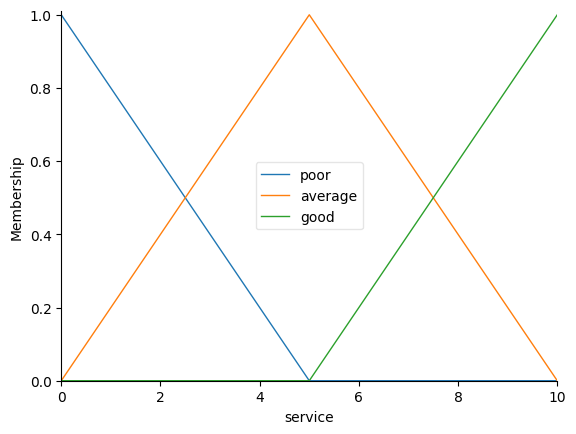

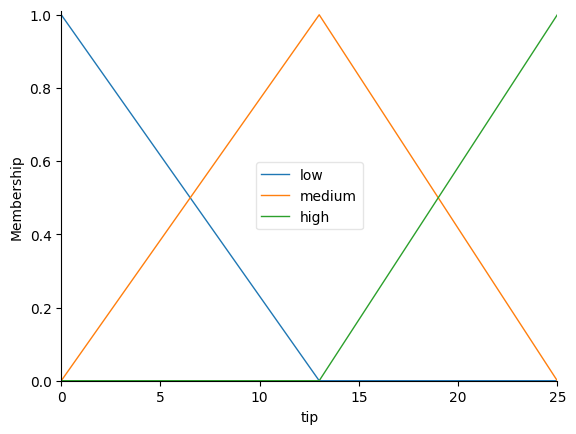

In [ ]:
#custom membership function can be built interactively with a familia
#python API
tip['low']=fuzz.trimf(tip.universe,[0,0,13])
tip['medium']=fuzz.trimf(tip.universe,[0,13,25])
tip['high']=fuzz.trimf(tip.universe,[13,25,25])

quality.view()
service.view()
tip.view()

(<Figure size 640x480 with 1 Axes>, <Axes: >)

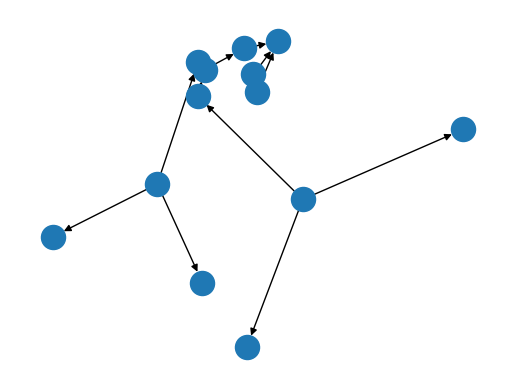

In [ ]:
#fuzzy rules
import skfuzzy as fuzz
from skfuzzy import control as ctrl

rule1=ctrl.Rule(quality['poor'] | service['poor'], tip['low'])
rule2=ctrl.Rule(service['average'], tip['medium'])
rule3=ctrl.Rule(service['good'] | quality['good'], tip['high'])

rule1.view()

13.369234285714288


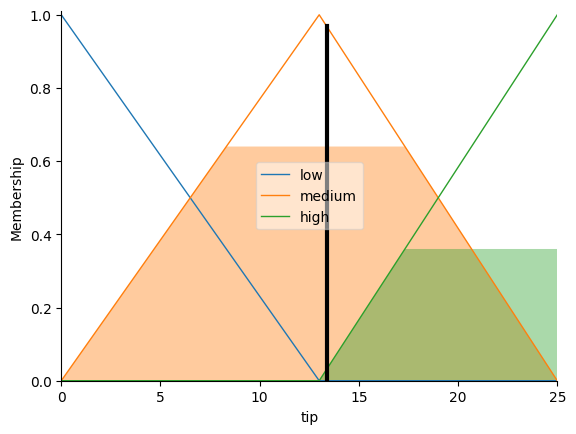

In [ ]:
#Control System Creation and Simulation
tipping_ctrl = ctrl.ControlSystem([rule1,rule2,rule3])

#Simulation the control system
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)

#Pass inputs to the ControlSystem using Antecedent labels with Python
tipping.input['quality']=6.5
tipping.input['service']=6.8

#Crunch the numbers
tipping.compute()

#Once computed, we can view the result as well as visualize it.
print(tipping.output['tip'])
tip.view(sim=tipping)